# Assignment 2

In [1]:
!pip install scikit-image==0.15.0
!pip install ipywidgets==7.5.1

In [0]:
import numpy as np
from skimage import io
from skimage import transform
from matplotlib import pyplot as plt
import ipywidgets as widgets
from skimage import filters
from skimage import color

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Regolazione delle impostazioni delle dimensioni di visualizzazione del notebook

In [0]:
plt.rcParams["figure.figsize"] = [15, 5]

## Caricamento Immagine

In [0]:
images = "/content/drive/My Drive/Digital Signal and Image Management/Esercitazioni/Esercitazione 3/images/"

In [0]:
im = io.imread(images + "redpanda.png")

NB Skimage carica direttamente le immagini in numpy array, è comunque possibile usare:<br>
**Pillow**<br>
!conda install pillow<br>
from PIL import Image<br>
im = Image.open('images/redpanda_small.png')<br>
im = np.asarray(im) # Necessaria conversione di formato<br>
<br>
**OpenCV**<br>
!pip install opencv-python<br>
import cv2 as cv<br>
im = cv.imread('images/redpanda_small.png')<br>
im = im[::-1:-1:0] # Necessaria conversione BGR -> RGB

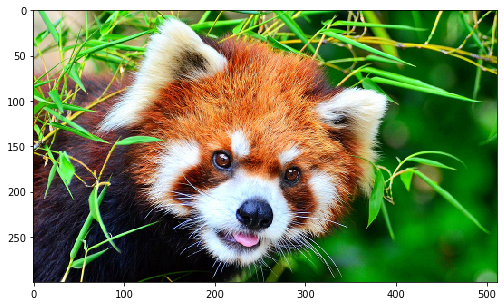

In [7]:
plt.imshow(im)

In [8]:
type(im)

imageio.core.util.Array

In [9]:
im.shape

(300, 512, 4)

L'immagine possiede dimensione 300 righe x 512 colonne di pixel, con 4 canali: Red, Green, Blue, Alpha (trasparenza)

Visualizzazione dei singoli canali per l'immagine:

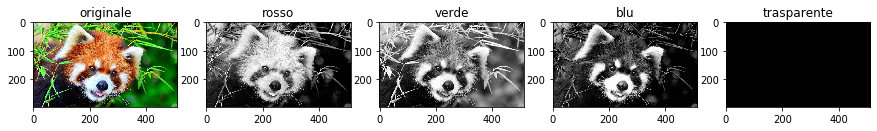

In [10]:
fig = plt.figure()
columns = 5
rows = 1
fig.add_subplot(rows, columns, 1)
plt.title("originale")
plt.imshow(im)
fig.add_subplot(rows, columns, 2)
plt.title("rosso")
plt.imshow(im[:,:,0], cmap = "gray")
fig.add_subplot(rows, columns, 3)
plt.title("verde")
plt.imshow(im[:,:,1], cmap = "gray")
fig.add_subplot(rows, columns, 4)
plt.title("blu")
plt.imshow(im[:,:,2], cmap = "gray")
fig.add_subplot(rows, columns, 5)
plt.title("trasparente")
plt.imshow(im[:,:,3], cmap = "gray")
plt.show()

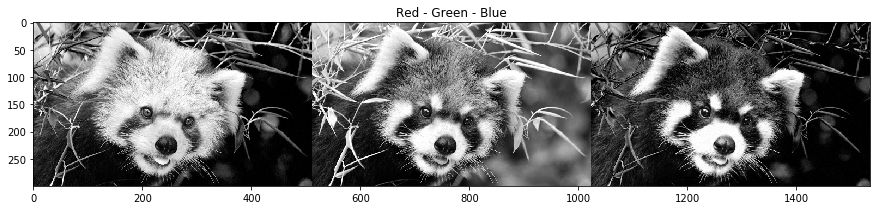

In [11]:
# Versione alternativa
mosaic = np.concatenate((im[:,:,0],im[:,:,1],im[:,:,2]),axis=1)
plt.imshow(mosaic, cmap='gray'); plt.title('Red - Green - Blue'); plt.show()

NB Ogni canale viene stampato attraverso l'indicazione del colore (terza dimensione di im)

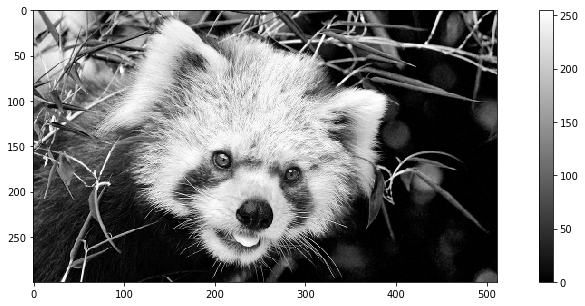

In [12]:
#Rosso
#plt.imshow(im[:,:,0]) versione con colore
plt.imshow(im[:,:,0], cmap = "gray")
plt.colorbar()

Visualizzazione canali R,G,B con mappe colore

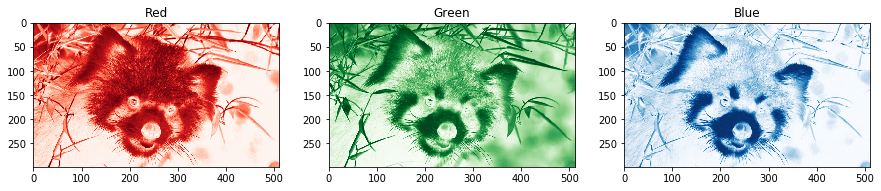

In [13]:
plt.subplot(1,3,1); plt.imshow(im[:,:,0], cmap='Reds'); plt.title('Red')
plt.subplot(1,3,2); plt.imshow(im[:,:,1], cmap='Greens'); plt.title('Green')
plt.subplot(1,3,3); plt.imshow(im[:,:,2], cmap='Blues'); plt.title('Blue')
plt.show()

Caricamento dell'immagine in scala di grigi

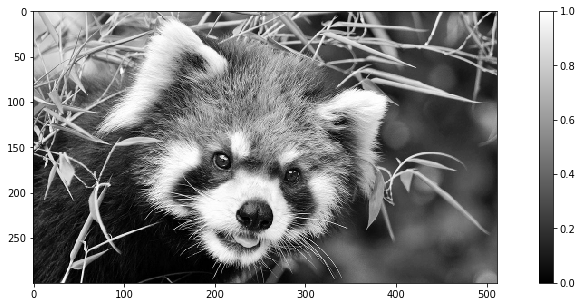

In [14]:
im = io.imread(images + 'redpanda.png', as_gray=True)
plt.imshow(im, cmap='gray'); plt.colorbar(); plt.show()

Il caricamento in scala di grigi può essere ottenuto con le altre librerie usando i seguenti comandi:
<br>
**Pillow**<br>
im = Image.open('images/redpanda.png').convert('L')<br>
https://pillow.readthedocs.io/en/stable/handbook/concepts.html#concept-modes
<br>
**OpenCV**<br>
im = cv.imread('images/redpanda.png', 0)

## Elaborazione Puntuale delle immagini

Applico una operazione su un singolo pixel, poi scopro cosa genera l'applicazione della funzione nell'immagine

Applico delle trasformazioni come moltiplicazioni o somme sui parametri modificati, a partire da quella sotto che è una elevazione a potenza.
In questo caso un valore <1 all'esponente schiarisce, superiore scurisce

Schieramento tramite somma:

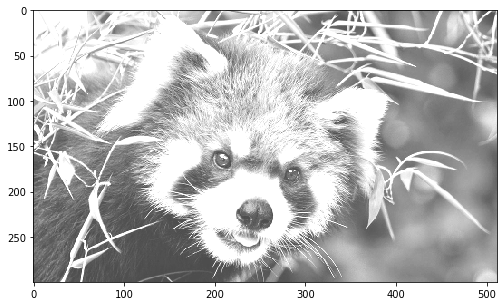

In [15]:
plt.imshow(im+0.3, cmap='gray'); plt.clim(0,1); plt.show()

Schieramento tramite moltiplicazione:

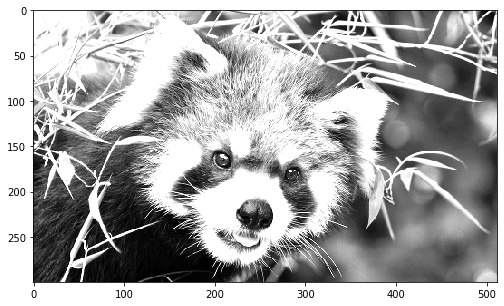

In [16]:
plt.imshow(im*1.5, cmap='gray'); plt.clim(0,1); plt.show()

Schieramento tramite potenza:

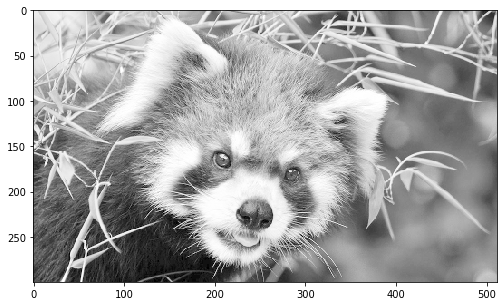

In [17]:
plt.imshow(im**.5, cmap='gray'); plt.clim(0,1); plt.show()

In [18]:
# Dimostrazione interattiva gamma
def gamma_correct(gamma=1.0):
    ax1 = plt.subplot(121)
    ax1.imshow(im**gamma, cmap='gray');

    ax2 = plt.subplot(122)
    xs = np.array(range(0,101))/100.0
    ys = xs**gamma
    ax2.plot([0,1],[0,1],dashes=[1, 1])
    ax2.plot(xs,ys)
    ax2.set_xlim([0,1])
    ax2.set_ylim([0,1])
gamma_slider = widgets.FloatLogSlider(min=-1, max=1, base=10, value=1.0)
widgets.interact(gamma_correct, gamma=gamma_slider)

interactive(children=(FloatLogSlider(value=1.0, description='gamma', max=1.0, min=-1.0), Output()), _dom_class…

<function __main__.gamma_correct>

## Ridimensionamento delle immagini

In [19]:
fog = io.imread(images + 'fog.jpg', as_gray=True)
fog.shape

(2616, 3488)

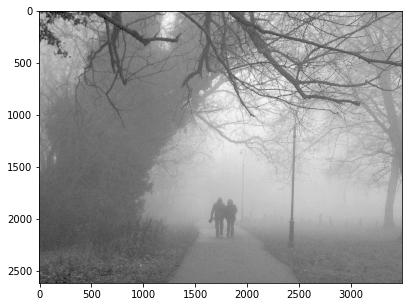

In [20]:
plt.imshow(fog, cmap='gray'); plt.show()

Riduco le dimensioni al 30%:

(784, 1046)


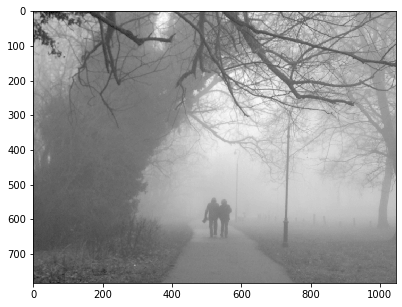

In [21]:
new_shape = (int(fog.shape[0]*0.3), int(fog.shape[1]*0.3))
fog_small = transform.resize(fog, new_shape)
print(fog_small.shape)
plt.imshow(fog_small, cmap='gray'); plt.show()

## Filtraggio (operazioni di elaborazione locale)
Il risultato dell'operazione dipende dal pixel e dal suo intorno.

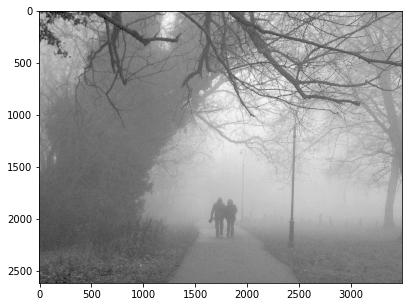

In [22]:
#Versione originale
im = io.imread(images + "fog.jpg", as_gray=True)
plt.imshow(im, cmap = "gray")

### Operazione di sfocatura dell'immagine:

/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


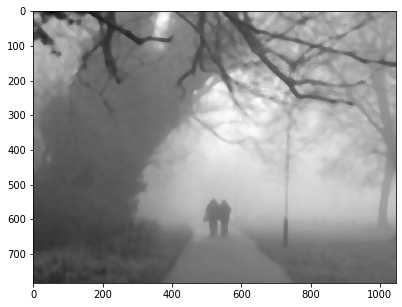

In [23]:
se = np.ones((15,15)) #Dimensione dell'intorno che considero
fog_order = filters.rank.percentile(fog_small, se, p0=0.5)
plt.imshow(fog_order, cmap='gray'); plt.show()

### Operazione di estrazione edge:

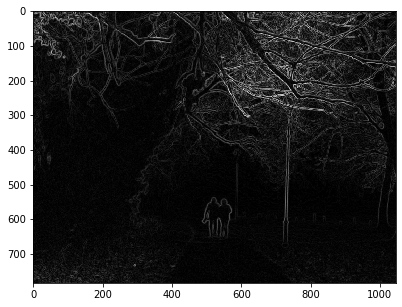

In [24]:
fog_edge = filters.sobel(fog_small)
plt.imshow(fog_edge, cmap='gray'); plt.show()

**filters.sobel()** calcola direttamente la magnitudine degli edge in tutte le direzioni.<br>
<br>
Il filtro di sobel per definizione è orientato.<br>

Le componenti separate possono essere calcolate con scipy.ndimage.sobel(), oppure con scipy.signal.convolve2d() usando un filtro opportunamente definito.<br><br>

https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.sobel.html <br>https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html

# Unsharp Mask - Assignment

L'obiettivo è quello di creare un filtro di sharpening con cui accentuare i dettagli dell'immagine originale tramite l'utilizzo di una unsharped mask:
1.   Dall'immagine originale creo una immagine modificata con effetto blur
2.   Sottraggo dall'originale il risultato e ottengo la Unsharp Mask
3.   Sommo la maschera all'immagine originale

Con questa procedura riesco ad ottenere un incremento della marcatura dei contorni con sagome più distinte

Si procede con l'ottenimento dell'immagine a cui viene applicato il filtro gaussiano; <br>Nel seguente risultato il valore di sigma (deviazione standard) è pari a 4:

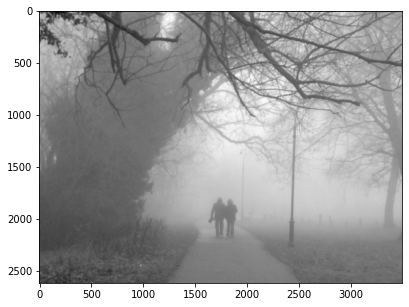

In [25]:
blur = im
blur = filters.gaussian(blur, sigma = 4)
plt.imshow(blur, cmap = "gray")

Si sottrae all'immagine originale la versione sfocata (ottenuta al passo precedente) per poter ottenere l'Unsharp Mask, che consiste nei dettagli dell'immagine:

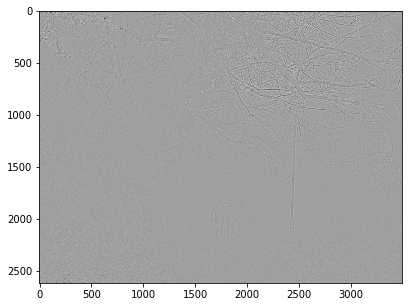

In [27]:
unsharp_mask = im-blur
plt.imshow(unsharp_mask, cmap="gray")

Si procede con l'aggiunta dell'Unsharp Mask all'immagine originale per accentuarne i dettagli:

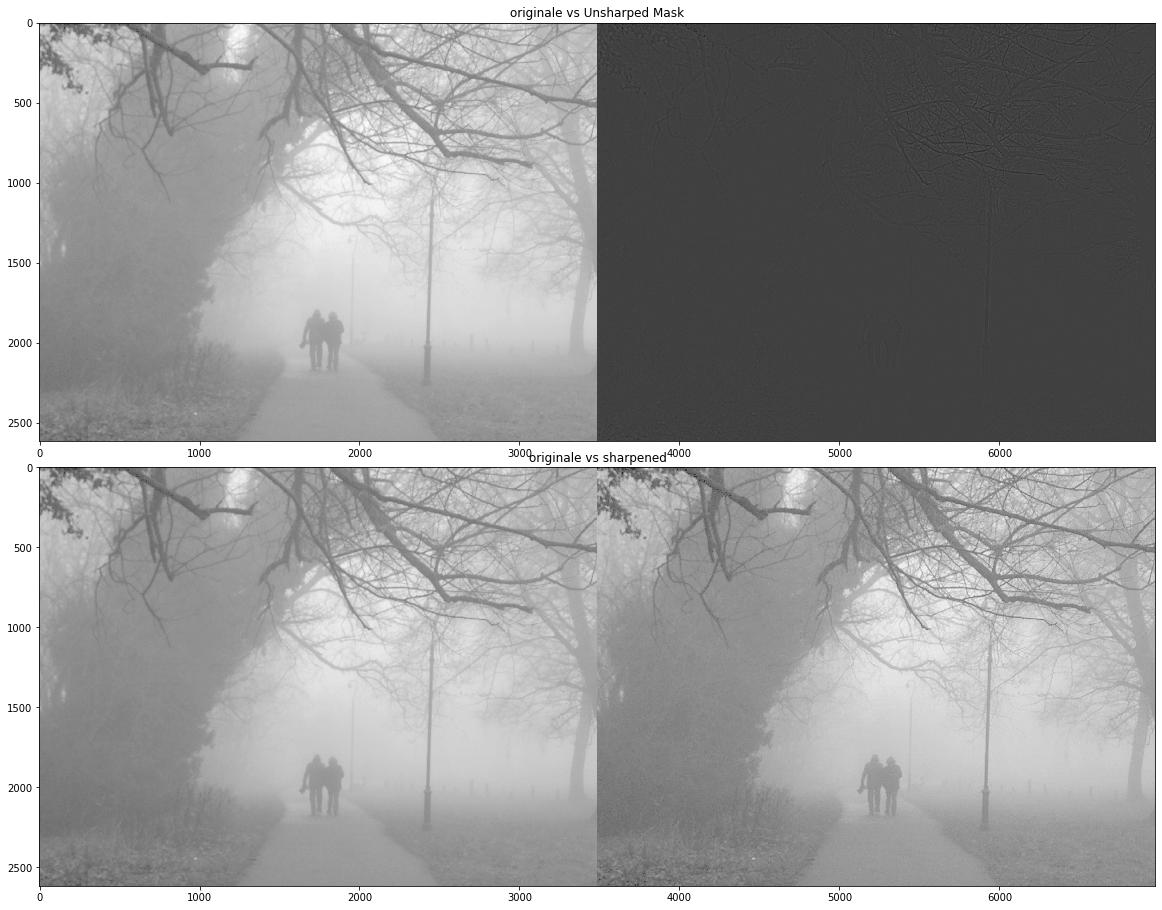

In [28]:
modificata = im + unsharp_mask
primaparte = np.concatenate((im, unsharp_mask), axis = 1)
secondaparte = np.concatenate((im, modificata), axis = 1)
fig = plt.figure(figsize = (20, 30))
fig.add_subplot(1,1,1)
plt.title("originale vs Unsharp Mask")
plt.imshow(primaparte, cmap = "gray")
fig.add_subplot(2,1,2)
plt.title("originale vs sharpened")
plt.imshow(secondaparte, cmap = "gray")
plt.show()

Si effettua un tentativo per accentuare i dettagli incrementando il valore di sigma del filtro gaussiano:

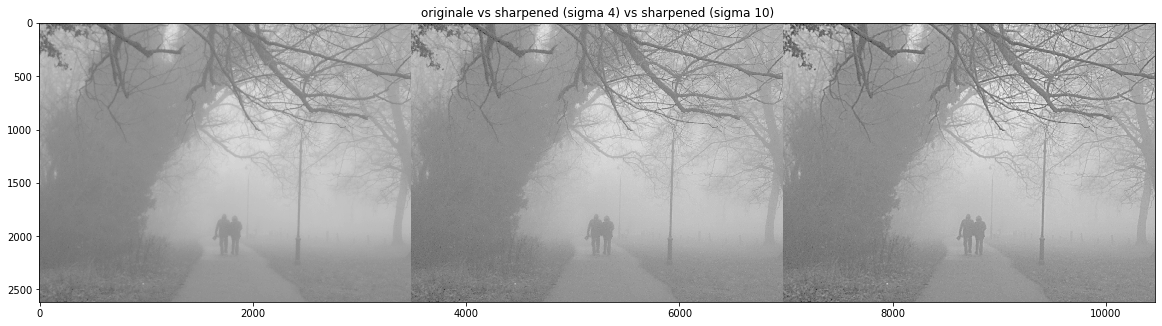

In [30]:
blur = im
blur = filters.gaussian(blur, sigma = 4)
blur2 = im
blur2 = filters.gaussian(blur, sigma = 10)
unsharp_mask = im-blur
unsharp_mask2 = im-blur2
modificata = im + unsharp_mask
modificata2 = im + unsharp_mask2
confronto = np.concatenate((im, modificata, modificata2), axis = 1)

fig = plt.figure(figsize = (20, 30))
plt.title("originale vs sharpened (sigma 4) vs sharpened (sigma 10)")
plt.imshow(confronto, cmap="gray")
plt.show()

Come è possibile osservare si denota una marcatura più accentuata dei contorni con un valore maggiore di sigma (ultima immagine a destra).